# Fake job Detection: Investigating Fake job posts to avoid the job scam

# Notebook  1: Data loading and Cleaning
**First setp:Data collecting loading,cleaning and getting some first taste of the dataset.**



**By: Polly Pang**


In this portion of the notebook, I will define the purpose of this project, and the reasons why I am doing this analysis. Then I will start from the fundamental steps to load and clean the dataset for further EDA in the next portion.

---

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home"> Contents</h3>

* [1. Introduction](#1)
    - [1.1 1.1 Problem Definition](#1.1)
    - [1.2 Data Collection](#1.2)
* [2. Libraries](#2)
* [3. Loading the Data](#3)
* [4. Data Overview](#4)
    - [4.1 An Overview from the Data](#4.1)
    - [4.2 Column Description](#4.2)
    - [4.3 Check duplicted](#4.3)
    - [4.4 Missing Values](#4.4)    
* [5. Cleaning](#5)
    - [5.1 drop job_id](#5.1)
    - [5.2 Split the undity column](#5.2)
    - [5.3 Fill the Nan](#5.3)
* [6. Save Data](#6)
* [7. End of Notebook 1](#7)

# 1. Introduction  <a id="1"></a>

## 1.1 Problem Definition

Fake job posts and the number of employment scams are increasing. According to the Canadian Anti-Fraud Centre, there were 2,100 job-related scam complaints across the country by the end of November 2020 compared to 1,764 in all of 2019.

During the pandemic, current market situation and economic downturn dominated a huge reduction in job availability. According to BBB (Better Business Bureau) job scams have been around for years, that in 2019 there were an estimated 14 million victims resulting in $2 billion in direct losses related to job scams via different online platform (Linkedin, indeed, Monster etc.) and that the problem worsened in 2020. And job scams were also in the top five of BBB's list of riskiest scams across Canada.

My aim for this project is to, maximum the possibility find fake jobs from online job posts, and help job seekers and employers avid employment scams. Although this a tricky question, we can still address this with Natural Language Processing (NLP) and Machine Learning approaches.

## 1.2 Data Data Collection

The dataset used in the project is provided by Kaggle and published by a user whose id is SHIVAM BANSAL. This dataset was first collected by the University of the Aegean, Laboratory of Information & Communication Systems Security, which contains 18K job descriptions, both textual information and meta-information about the jobs.

---

# 2. Libraries <a id="2"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [65]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import joblib


# 3. Loading data  <a id="3"></a>

In [66]:
# loading the data
df_fake_job=pd.read_csv("data/fake_job_postings.csv")

---

# 4. Data Overview <a id="4.1"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [67]:
# check top 5 rows 
df_fake_job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


- looks like the `job_id` is the index in the dataset and it is starts from 1, which means this is redundant column. 

In [68]:
print(f"There are {df_fake_job.shape[0]} rows and {df_fake_job.shape[1]} columns in the dataframe.")

There are 17880 rows and 18 columns in the dataframe.


In [69]:
# get columns
print(list(df_fake_job.columns))

['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']


## 4.2 Column Description<a id="4.2"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

`job_id`: Identification number given to each job posting

`title`: Job title

`location`:Where the job is located

`department`:department this job is offered by

`salary_range`: Expected pay range

`company_profile`: Information about the hiring company

`description`: Job description

`requirements`:Pre-requisites to qualify for the job

`benefits`:Benefits provided by the employer

`telecommuting`:Is the job remote or not

`has_company_logo`:The post have a company logo or not

`has_questions`:Does the post have any questions

`employment_type`:Full-time, part-time, contract, temporary and other, in total 5 categories

`required_experience`: Experience level,Entry level, Executive, Director etc…

`required_education`:Education level,High School, Bachelor, Master etc…

`industry`: Relevant industry of the job

`function`: Main function of the role

`fraudulent`: Fake job post or not(0: Real, 1: Fake)

## 4.3 Check duplicted <a id="4.3"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [70]:
# check the data types of the columns
df_fake_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [71]:
# check duplicted column
df_fake_job.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17875    False
17876    False
17877    False
17878    False
17879    False
Length: 17880, dtype: bool

In [72]:
# check duplicted rows
df_fake_job.T.duplicated()

job_id                 False
title                  False
location               False
department             False
salary_range           False
company_profile        False
description            False
requirements           False
benefits               False
telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience    False
required_education     False
industry               False
function               False
fraudulent             False
dtype: bool

- There is **no duplicted** column or row in the dataframe.

## 4.4 Missing values <a id="4.4"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [73]:
# % Missing data in the dataset
df_missing=df_fake_job.isnull().mean().sort_values(ascending = False).to_frame().reset_index()
df_missing.columns=['Name','percentage']
df_missing

,Name,percentage
0,salary_range,0.839597
1,department,0.645805
2,required_education,0.453300
3,benefits,0.403244
4,required_experience,0.394295
5,function,0.361018
6,industry,0.274217
7,employment_type,0.194128
8,company_profile,0.185011
9,requirements,0.150727


<Figure size 432x288 with 0 Axes>

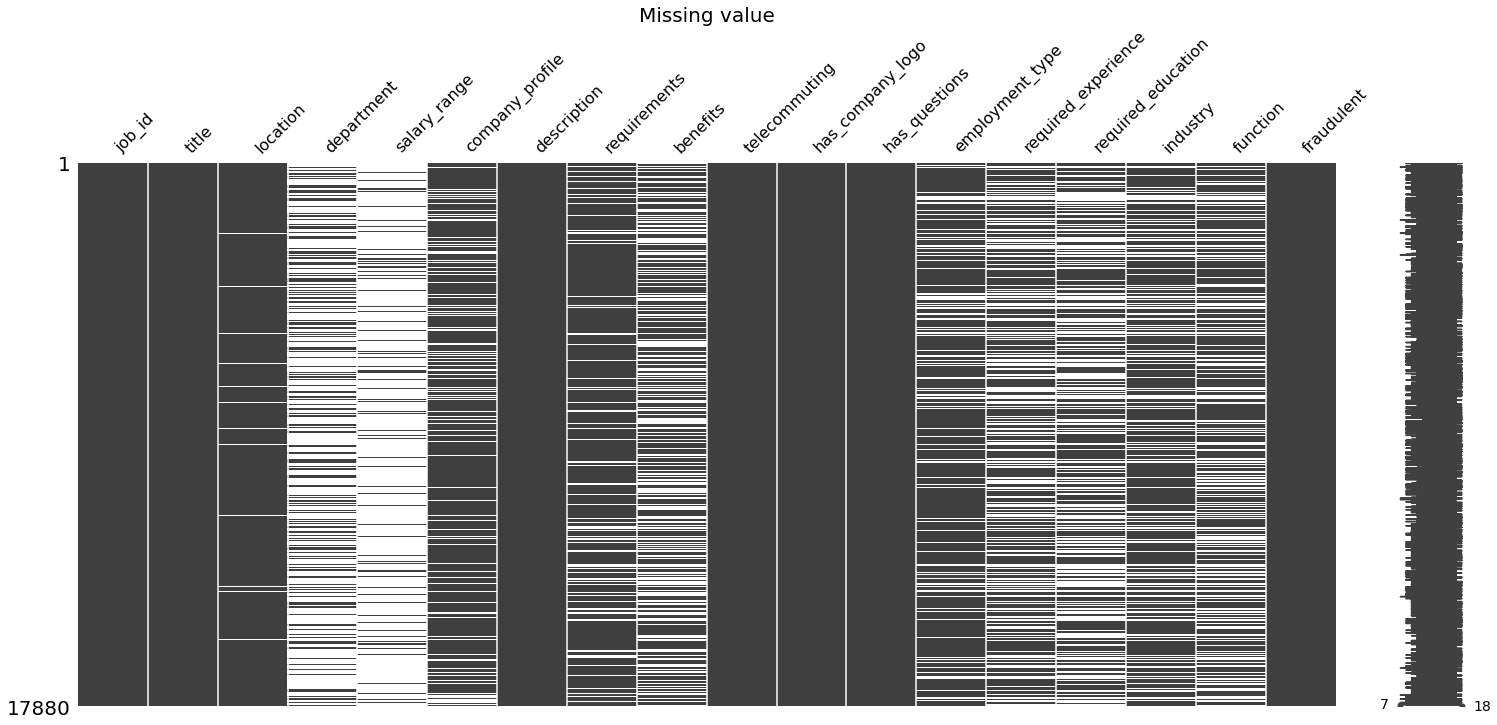

In [74]:
# plot the NaNs in data set (in white)
plt.figure()
msno.missingno.matrix(df_fake_job)
plt.title("Missing value",fontsize=20)
plt.show()

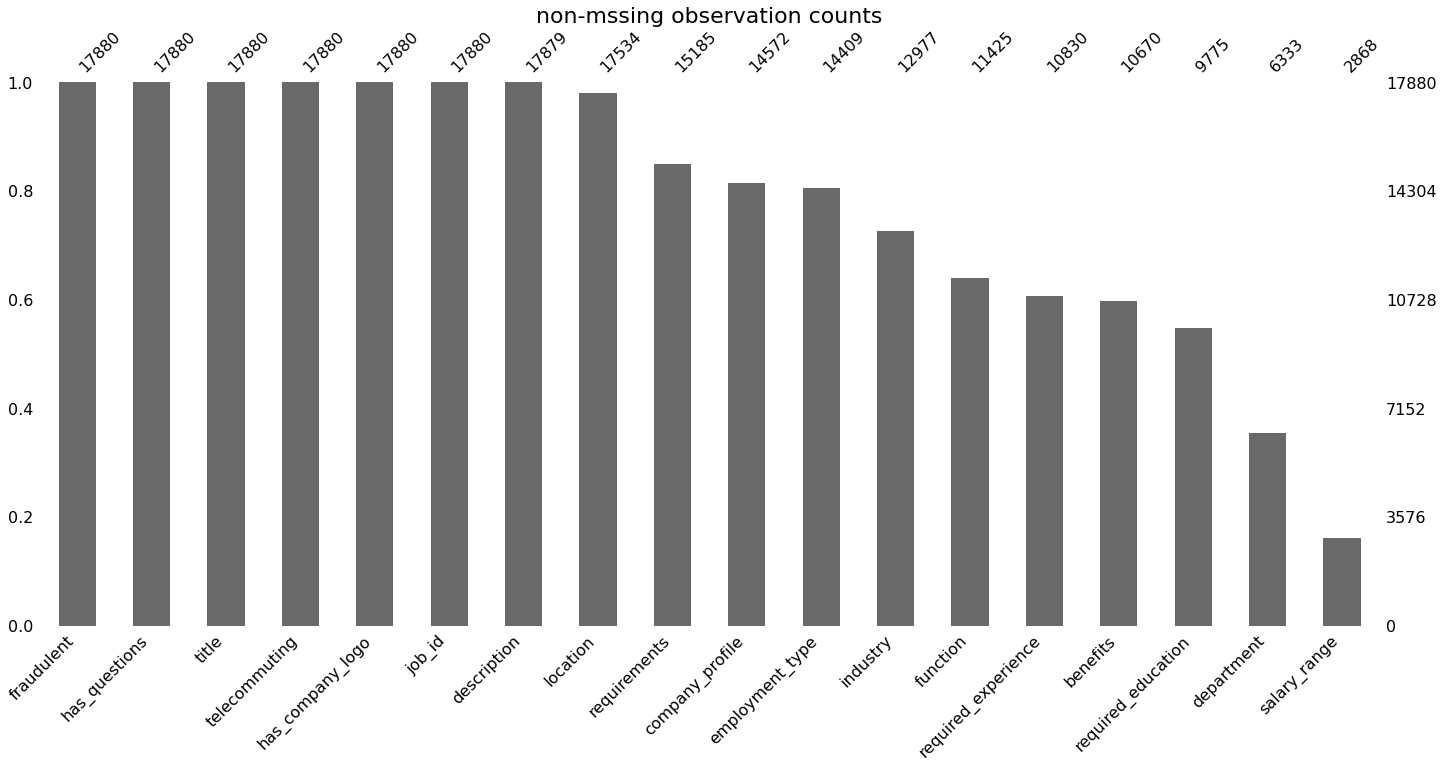

In [75]:
plt.figure()
msno.bar(df_fake_job,sort="descending")
plt.title("non-mssing observation counts",fontsize=22)
plt.show()

- There are so many missing value in the datasets, the percentage is obviousily larger then 5%, I will **replace null** to string **"blank"** instead of dropping them as valid observation. It could mean that fake posts often have missing data, I need to keep them to for further investigat.


- All the feature contains Nans are categorical data.
----

# 5. Cleaning

## 5.1  drop job_id<a id="5.1"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [76]:
df_fake_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [77]:
# remove job_id,duplicted with index.
df_job_clean=df_fake_job.copy()
df_job_clean.drop(columns='job_id',index=1,inplace=True)

In [78]:
# job_id has been dropped
df_job_clean.head(1)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


## 5.2 Handle the undity columns <a id="5.2"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

- Split the `location` column into `country`, `province` and `city`

In [79]:
df_job_clean[['country','province','city']]=df_job_clean['location'].str.split(", ",n=2,expand = True)

In [80]:
df_job_clean.replace('None', np.nan, inplace=True) # replace none into Nan

In [81]:
df_job_clean.head(1) # column location has been split into country, province and city 3 columns

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,province,city
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York


In [82]:
# column missing % after split
missing_location=df_job_clean.isna().mean()[['location','country','city','province']].to_frame().reset_index()
missing_location.columns=['name','missing']
missing_location

,name,missing
0,location,0.019352
1,country,0.019352
2,city,0.024610
3,province,0.024610


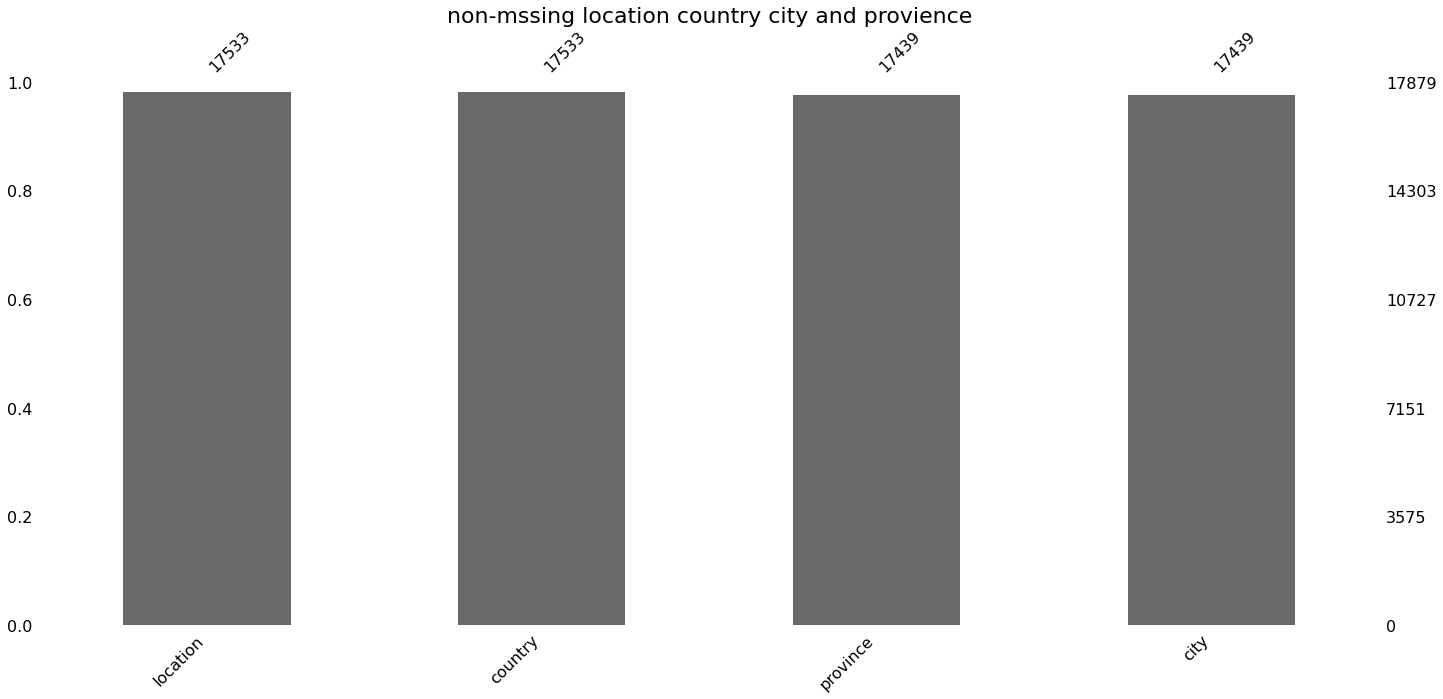

In [83]:
plt.figure()
msno.bar(df_job_clean[['location','country','province','city']])
plt.title("non-mssing location country city and provience",fontsize=22)
plt.show()

- column `location`and `country` keeps same observations in the graph, and `provience` and `city` has more mssing values, this means column `location` has been split successfully and we have some jobs with only provide country in the posts.  

- There are 84% of `salary_range` is missing, and it is hard for us to get extra info from other place to implut it. We are going to change it into a bianary column as `has_salary_range`

In [87]:
# check nans in the column salary_range
df_job_clean['salary_range'].isnull().sum()

15011

In [89]:
# salary_range into binary column 0--> has no salary_range,1--> has salary_range
df_job_clean['salary_range']=np.where(df_job_clean['salary_range'].isnull()==True,0,1)

In [90]:
# check result
df_job_clean['salary_range'].value_counts()

0    15011
1     2868
Name: salary_range, dtype: int64

In [94]:
df_job_clean.rename(columns={'salary_range':'has_salary_range'},inplace=True)

In [95]:
df_job_clean.replace('None', np.nan, inplace=True)

In [96]:
df_job_clean.head(1)

,title,location,department,has_salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,province,city
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York


In [97]:
df_job_clean['has_salary_range'].isna().mean()

0.0

- column `salary_range` has been change into `has_salary_range` and with no missing value.

## 5.3 Fill the Nan <a id="5.3"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

- Fill Nans with string **'Blank'**

In [98]:
#Fill Nans with string 'Blank'
df_job_clean.fillna('Blank',inplace=True)

In [99]:
# check % of Nan
df_job_clean.isna().mean()

title                  0.0
location               0.0
department             0.0
has_salary_range       0.0
company_profile        0.0
description            0.0
requirements           0.0
benefits               0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
fraudulent             0.0
country                0.0
province               0.0
city                   0.0
dtype: float64

- drop `location`  as this is redumdant now.

In [102]:
df_job_clean.drop(['location'],axis=1,inplace=True)

In [104]:
df_job_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17879 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17879 non-null  object
 1   department           17879 non-null  object
 2   has_salary_range     17879 non-null  int32 
 3   company_profile      17879 non-null  object
 4   description          17879 non-null  object
 5   requirements         17879 non-null  object
 6   benefits             17879 non-null  object
 7   telecommuting        17879 non-null  int64 
 8   has_company_logo     17879 non-null  int64 
 9   has_questions        17879 non-null  int64 
 10  employment_type      17879 non-null  object
 11  required_experience  17879 non-null  object
 12  required_education   17879 non-null  object
 13  industry             17879 non-null  object
 14  function             17879 non-null  object
 15  fraudulent           17879 non-null  int64 
 16  coun

- `location` has been dropped, there are 19 columns and 17897 rows in the datafame.

<Figure size 432x288 with 0 Axes>

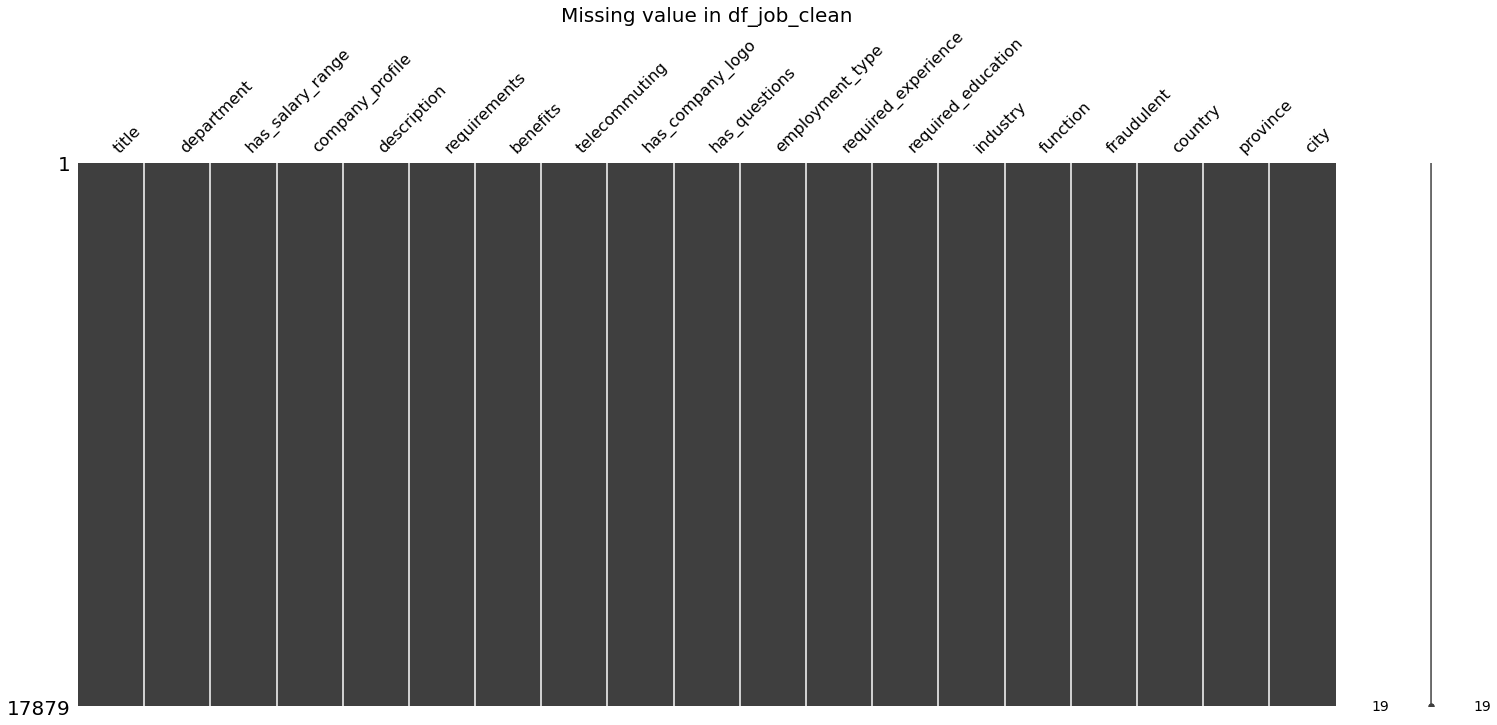

In [105]:
# plot the NaNs in df_job_clean (missing white)
plt.figure()
msno.missingno.matrix(df_job_clean)
plt.title("Missing value in df_job_clean",fontsize=20)
plt.show()

####   No Nan in the dataframe and we have tidy job location and has_salary_range.

In [106]:
# Take 5 random samples from the df.
df_job_clean.sample(5)

,title,department,has_salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,province,city
3176,Customer Service Operator,Customer Service,0,At Command we care enough to consistently plac...,At Command we care enough to consistently plac...,Responsibilities:Determines requirements by wo...,Benefits:15.25/hr (non-negotiable)Medical/dent...,0,1,1,Blank,Blank,Blank,Blank,Blank,0,US,FL,Miami
569,English Teacher Abroad,Blank,0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,Blank,Bachelor's Degree,Education Management,Blank,0,US,NY,Oneonta
7417,"Director, eCommerce",Blank,0,"McKibbon Hotel Management, Inc., based in Tamp...","McKibbon Hotel Management, Inc., based in Tamp...",Blank,Blank,0,1,0,Full-time,Director,Bachelor's Degree,Hospitality,Marketing,0,US,FL,Tampa
13933,Engineering Tech,Blank,0,Valor Services provides Workforce Solutions th...,Take your career to the next level with this f...,EDUCATION and/or EXPERIENCEBachelor’s degree i...,Blank,0,1,1,Full-time,Blank,Blank,Oil & Energy,Engineering,0,US,TX,Houston
11548,Mobile Developer-Back End,Information Technology,0,Aptitude Staffing Solutions has redesigned the...,Our mission is to help all the world’s people ...,What You Offer:Experience in writing clean and...,Blank,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Environmental Services,Information Technology,1,US,CA,San Francisco


#### I find there are still empty columns in some of the columns for example `city`. This may cased by some special characters. The columns are actually empty but not Nan.

In [107]:
# there are empty string in the column city
df_job_clean['city'].isin(['']).sum()

1627

In [108]:
df_job_clean['city'].replace('','Blank',inplace=True)

In [109]:
# empty strings have been replced into 'Blank'
df_job_clean['city'].isin(['']).sum()

0

In [110]:
df_job_clean['province'].isin(['']).sum()

2139

In [111]:
df_job_clean['province'].replace('','Blank',inplace=True)

In [112]:
df_job_clean['province'].isin(['']).sum()

0

In [113]:
# Check if there are any empty string in the dataframe
for col in df_job_clean.columns:
    empty_col=df_job_clean[col].isin(['']).sum()
    print(f"column {col} has {empty_col} empty columns")

column title has 0 empty columns
column department has 0 empty columns
column has_salary_range has 0 empty columns
column company_profile has 0 empty columns
column description has 0 empty columns
column requirements has 0 empty columns
column benefits has 0 empty columns
column telecommuting has 0 empty columns
column has_company_logo has 0 empty columns
column has_questions has 0 empty columns
column employment_type has 0 empty columns
column required_experience has 0 empty columns
column required_education has 0 empty columns
column industry has 0 empty columns
column function has 0 empty columns
column fraudulent has 0 empty columns
column country has 0 empty columns
column province has 0 empty columns
column city has 0 empty columns


#### There is no Nan or empty string in the dataset.

---

# 6. Save Data<a id="6"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

## Plan:
- Save cleaned dataframe in the format of .csv.
- Save cleaned dataframe in the format of .pkl, in case execution time is excessive in the following EDA.

In [114]:
df_job_clean.to_csv(r'C:\Users\miru1\Desktop\DA_study\brainstation\projects\fake_job_detection\data\fake_job_cleaned.csv',encoding='utf-8', index=False)

In [115]:
# Save data as pickle file data folder
joblib.dump(df_job_clean, 'data/fake_job_cleaned.pkl')

['data/fake_job_cleaned.pkl']

# 7. End of Notebook 1<a id="7"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

This is the end of notebook part 1 of project Fake Job Prediction. In this notebook, I finished the data loading and cleaning.No the dataset is cleaned and ready for EDA. I will give more insight into the next proportion, through the process of exploratory data analysis (EDA). Please see my next notebook. Notebook 2: EDA.